# [Opikanoba.org](https://opikanoba.org)

## Extraction Publique RPPS 
Ce notebook se base sur l'extraction publique du 28/05/2018 disponible sur le site de l'ASIP Sante.
Elle est téléchargeable dans la rubrique [Extractions en libre accès](https://annuaire.sante.fr/web/site-pro/extractions-publiques). Le fichier est téléchargé localement dans le répertoire `/tmp/asip`.

In [1]:
fname='/tmp/asip/ExtractionMonoTable_CAT18_ToutePopulation_201805280855.csv'

Définition des noms de colonnes, plus faciles à manipuler que les noms de l'entete du CSV.
`"Type d'identifiant PP"` est remplacé par `type_identifiant_pp`

In [2]:
KEYS_CAT18 = ["type_identifiant_pp", "identifiant_pp", "identification_nationale_pp",
                  "code_civilite_exercice", "libelle_civilite_exercice", "nom_exercice",
                  "prenom_exercice", "code_profession", "libelle_profession",
                  "code_categorie_professionnelle", "libelle_categorie_professionnelle",
                  "code_savoir_faire", "libelle_savoir_faire", "code_type_savoir_faire",
                  "libelle_type_savoir_faire", "numero_siret_site", "numero_siren_site",
                  "numero_finess_site", "numero_finess_etablissement_juridique",
                  "raison_sociale_site", "enseigne_commerciale_site", "identifiant_structure",
                  "complement_destinataire", "complement_point_geographique",
                  "numero_voie", "indice_repetition_voie", "code_type_de_voie", "libelle_type_de_voie",
                  "libelle_voie", "mention_distribution", "bureau_cedex", "code_postal",
                  "code_commune", "libelle_commune", "code_pays", "libelle_pays",
                  "telephone", "telephone_2", "telecopie", "adresse_e-mail",
                  "adresse_bal_mssante"
                  ]

Lecture du fichier dans pandas


In [3]:
import pandas
df=pandas.read_csv(fname, delimiter=';', names=KEYS_CAT18, header=0, index_col=False)


/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (24,31) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Nombre de lignes dans le fichier

In [4]:
len(df)

698443

Nombre de PS uniques

In [149]:
df['identifiant_pp'].nunique()

563447

Verification qu'il y a autant de code profession différents que de libellés pour ces mêmes codes

In [6]:
df['code_profession'].nunique() == df['libelle_profession'].nunique()

True

### Professions présentes dans le fichier

In [7]:
list(df.libelle_profession.unique())

['Médecin',
 'Sage-Femme',
 'Pharmacien',
 'Chirurgien-Dentiste',
 'Pédicure-Podologue',
 'Masseur-Kinésithérapeute']

Répartition des codes profession

In [8]:
df.code_profession.value_counts()

10    413234
70    101962
21     76898
40     57611
50     32847
80     15891
Name: code_profession, dtype: int64

In [9]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [10]:
prof=df.libelle_profession.value_counts()

## Représentation graphique de la répartition des PS par profession

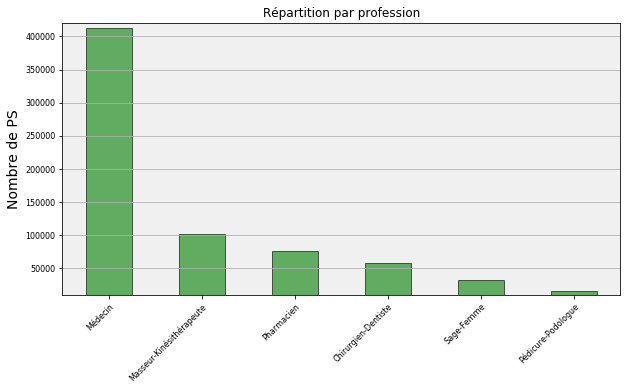

In [11]:
import matplotlib.cm as cm, matplotlib.font_manager as fm

label_font = fm.FontProperties(family='DejaVu Sans', style='normal', size=14, weight='normal', stretch='normal')
ticks_font = fm.FontProperties(family='DejaVu Sans', style='normal', size=8, weight='normal', stretch='normal')

gr=prof.plot(kind='bar', figsize=[10,5], alpha=0.6, color='g', edgecolor='k', grid=False, ylim=[10000,420000])
gr.set_xticks(list(map(lambda x: x, range(0, len(prof)))))
gr.set_xticklabels(prof.index, rotation=45, rotation_mode='anchor', ha='right', fontproperties=ticks_font)
gr.yaxis.grid(True)
for label in gr.get_yticklabels():
    label.set_fontproperties(ticks_font)
gr.set_facecolor('#f0f0f0')
gr.set_title('Répartition par profession')
gr.set_xlabel('', fontproperties=label_font)
gr.set_ylabel('Nombre de PS', fontproperties=label_font)
plt.show()


Infos sur les savoirs faire : les 10 premiers

In [12]:
df.libelle_savoir_faire.value_counts().head(10)

Spécialiste en Médecine Générale       80482
Qualifié en Médecine Générale          73900
Radio-diagnostic                       29813
Psychiatrie                            22110
Anesthesie-réanimation                 17985
Médecine Générale                      15340
Cardiologie et maladies vasculaires    14840
Pédiatrie                              13505
Ophtalmologie                          12576
Gynécologie-obstétrique                 8503
Name: libelle_savoir_faire, dtype: int64

Les savoir faire les *moins* représentés

In [13]:
df.libelle_savoir_faire.value_counts().tail(10)

Hématologie (option Onco-hématologie)                           90
Qualification PAC                                               68
Urologie                                                        54
Gynéco-obstétrique et Gynéco médicale option Gynéco-médicale    33
Médecine vasculaire                                             30
CHIRURGIE ORALE                                                 19
Recherche médicale                                              14
Médecine légale et expertises médicales                         14
Exp. prat. art. R.5124-16 du CSP Thérapie Cellulaire             5
Expérience pratique article R.5141-129 du CSP                    2
Name: libelle_savoir_faire, dtype: int64

## Répartition des PS par catégorie avec représentation graphique

In [14]:
df.libelle_categorie_professionnelle.value_counts()

Civil        683060
Etudiant      12620
Militaire      2763
Name: libelle_categorie_professionnelle, dtype: int64

In [15]:
catpro=df.libelle_categorie_professionnelle.value_counts()

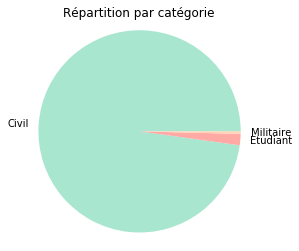

In [22]:
fig, gr2 = plt.subplots(figsize=[4,4])
gr2.pie(catpro, labels=catpro.index, colors=['#a8e6cf', '#ffaaa5', '#ffd3b6'])
gr2.set_title('Répartition par catégorie')
gr2.axis('equal')
plt.show()


# Adresses Mail MSSanté
Toutes les adresses MSSanté sont analysées et seule la partie postérieure au caractère @ est conservée, pour ne garder que les noms de domaines.

In [73]:
mss_providers = df.adresse_bal_mssante.str.split('@', expand=True).get(1)

In [103]:
len(mss_providers)

698443

mss_providers : série avec NaN si pas de domaine mssanté, sinon le domaine. (Index, Domain)

Liste des enregistrements qui ont 1 adresse MSSante du domaine spécifié : si 1 PS a 2 activités, il y a 2 lignes pour 1 même adresse. `df.loc[1687]` permet de vérifier le PS.

In [114]:
mss_providers.where(mss_providers == "chu-dijon.mssante.fr").dropna().head()

1687    chu-dijon.mssante.fr
2270    chu-dijon.mssante.fr
2562    chu-dijon.mssante.fr
4625    chu-dijon.mssante.fr
5104    chu-dijon.mssante.fr
Name: 1, dtype: object

In [115]:
# Affichage des PS avec tri sur l'adresse mail 
# df.loc[mss_providers.where(mss_providers == "chu-dijon.mssante.fr").dropna().index].sort_values(by='adresse_bal_mssante')

Nombre de lignes contenant 1 PS avec 1 adresse MSSanté du domaine du `chu-dijon.mssante.f`

In [101]:
len(df.loc[mss_providers.where(mss_providers == "chu-dijon.mssante.fr").dropna().index].adresse_bal_mssante)

1083

In [116]:
df[df.adresse_bal_mssante.astype(str).str.contains("chu-dijon.mssante.fr")].adresse_bal_mssante.count()

1083

In [58]:
len(df[df.adresse_bal_mssante.astype(str).str.contains("chu-dijon.mssante.fr")])

1083

Pour n'avoir que les adresses MSSanté différentes

In [102]:
len(pandas.unique(df.loc[mss_providers.where(mss_providers == "chu-dijon.mssante.fr").dropna().index].adresse_bal_mssante))

686

Affichage des noms de domaines les plus utilisés : les 20 premiers qui comptent le plus d'adresses mail MSSanté. Les lignes ne sont pas dédoublonnées.

In [150]:
mss_providers.value_counts().head(10)

medecin.mssante.fr                     35290
aura.mssante.fr                        12035
ramsaygds.mssante.fr                   12004
medecin.mp.mssante.fr                   5813
sephira.mssante.fr                      5459
pro.mssante.fr                          5391
masseur-kinesitherapeute.mssante.fr     3111
chu-montpellier.mssante.fr              2687
ssa.mssante.fr                          2520
aquitaine.mssante.fr                    2416
Name: 1, dtype: int64

Suppression des lignes en double. Si la même adresse mssanté apparait plusieurs fois, la 1ere est gardée, les suivantes sont supprimées.

In [135]:
df2 = df.loc[df.drop_duplicates('adresse_bal_mssante').adresse_bal_mssante.dropna().index]

In [136]:
len(df2)

94844

In [140]:
# df2.adresse_bal_mssante.value_counts()
mss_providers2 = df2.adresse_bal_mssante.str.split('@', expand=True).get(1)

In [151]:
mss_providers2.value_counts().head(10)

medecin.mssante.fr                     25165
aura.mssante.fr                         8267
ramsaygds.mssante.fr                    5023
medecin.mp.mssante.fr                   4526
pro.mssante.fr                          4014
sephira.mssante.fr                      3963
masseur-kinesitherapeute.mssante.fr     2704
ssa.mssante.fr                          2193
chu-montpellier.mssante.fr              1869
bretagne.mssante.fr                     1761
Name: 1, dtype: int64

In [148]:
mss_providers2.where(mss_providers == "chu-dijon.mssante.fr").dropna().count()

686

Filtre sur les CHU, CHRU, APHM et APHP pour listes les adresses mails attributés à 1 CHU

In [152]:
chu_vals=mss_providers2.value_counts().filter(regex='.*((ch(r?)u-)|aphm|aphp).*', axis=0)

In [144]:
chu_vals

chu-montpellier.mssante.fr        1869
chru-strasbourg.mssante.fr        1410
chu-toulouse.mssante.fr           1152
chu-nice.mssante.fr                943
aphp.mssante.fr                    927
chu-rouen.mssante.fr               833
chu-tours.mssante.fr               745
chu-dijon.mssante.fr               686
chu-nimes.mssante.fr               647
chu-poitiers.mssante.fr            647
chu-caen.mssante.fr                622
chu-limoges.mssante.fr             620
chu-besancon.mssante.fr            576
chu-bordeaux.mssante.fr             85
chu-clermontferrand.mssante.fr      81
aphm.mssante.fr                      9
chu-lyon.mssante.fr                  4
chru-lille.mssante.fr                2
chu-amiens.mssante.fr                1
chu-rennes.mssante.fr                1
Name: 1, dtype: int64

Représentation graphique (très basique) de la répartition

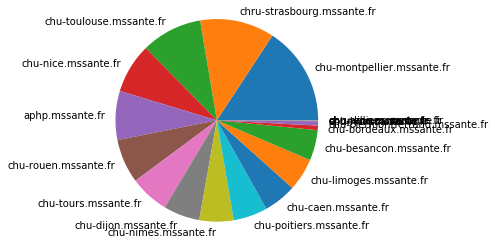

In [145]:
fig, gr3 = plt.subplots(figsize=[4,4])
gr3.pie(chu_vals, labels=chu_vals.index)
gr3.axis('equal')
plt.show()